# SCGP Example Usage

In [1]:
import numpy as np
import scgp

import warnings
warnings.filterwarnings("ignore")

## 1. Load Raw Data and Construct AnnData/EMObject

In [2]:
region_id = 'DKD_kidney_000'
cell_seg_df = scgp.load_cell_coords(f'data/DKD_kidney/{region_id}.cell_data.csv')
biomarker_expression_df = scgp.load_cell_biomarker_expression(f'data/DKD_kidney/{region_id}.expression.csv')
print("Cell Segmentation Information:")
display(cell_seg_df)

print("Biomarker Expression Information:")
display(biomarker_expression_df)


Cell Segmentation Information:


,CELL_ID,X,Y
0,1,2032,68
1,2,2254,70
2,3,2117,72
3,4,2271,73
4,5,2306,73
...,...,...,...
5382,5383,2774,3907
5383,5384,2275,3929
5384,5385,2267,3949
5385,5386,2157,4022


Biomarker Expression Information:


,CELL_ID,C1QC,CD107a,CD11b,CD141,CD183,CD196,CD227,CD25,CD31,...,CollagenIV,EpCAM,Nestin,Perlecan,RORgammaT,SPP1,TFAM,VWF,aSMA,bCatenin1
0,1,135.654007,89.472000,44.208000,18.731001,614.354004,37.567001,224.664001,25.333000,22.073999,...,184.235992,26.733000,30.921000,43.546001,1370.348999,137.897003,193.787003,56.000000,69.309998,161.397003
1,2,47.361000,51.536999,34.838001,32.949001,389.514008,41.042000,129.727005,21.351999,22.907000,...,140.337997,17.597000,25.981001,35.355999,855.218018,70.120003,69.490997,36.980999,64.323997,55.494999
2,3,441.257996,158.220001,42.285000,25.610001,1254.959961,33.452000,28.601999,30.299999,20.555000,...,537.150024,20.011999,94.227997,54.994999,913.262024,138.854996,215.020004,92.697998,104.330002,262.372009
3,4,131.121994,144.084000,42.173000,23.931000,533.804016,26.879999,428.061005,28.458000,23.841999,...,149.656006,28.129999,25.518999,46.750999,679.799011,346.490997,422.842010,82.272003,86.486000,194.125000
4,5,151.376999,116.136002,37.514999,22.374001,626.372009,35.584999,741.825989,30.292000,30.917999,...,152.052002,28.892000,21.379000,36.446999,826.604004,179.130005,424.204010,78.441002,80.954002,271.742004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,5383,221.151001,128.565994,38.723999,20.971001,1352.474976,52.738998,27.271999,31.733999,26.764000,...,202.440002,19.959000,141.488007,69.444000,1739.791992,145.285995,174.197006,74.232002,137.979004,258.569000
5383,5384,208.341003,79.788002,39.424000,33.183998,952.520996,32.862000,32.723999,27.392000,22.207001,...,100.741997,20.410000,106.438004,76.180000,1840.598999,171.069000,121.945000,85.535004,55.737000,69.249001
5384,5385,317.072998,89.333000,49.944000,23.761000,1131.209961,38.061001,28.363001,28.018000,22.368999,...,105.041000,19.658001,93.961998,54.918999,1562.654053,202.423996,116.978996,74.596001,74.157997,176.748001
5385,5386,48.768002,35.297001,42.681999,21.872000,47.209000,22.525000,18.823999,23.544001,25.642000,...,71.114998,25.014999,18.462000,44.132000,67.291000,68.954002,57.096001,39.244999,40.112999,42.414001


In [3]:
regions = ['DKD_kidney_000', 'DKD_kidney_011']
objs = []
for region_id in regions:
    cell_seg_df = scgp.load_cell_coords(f'data/DKD_kidney/{region_id}.cell_data.csv')
    biomarker_expression_df = scgp.load_cell_biomarker_expression(f'data/DKD_kidney/{region_id}.expression.csv')
    obj = scgp.construct_object(
        region_id, cell_seg_df, biomarker_expression_df,
        index_col='CELL_ID', mode='anndata')  # mode can be 'emobject' or 'anndata', both will work for the following steps
    objs.append(obj)

## 2. Run SCGP and Visualize

In [4]:
scgp_partitions, (features, model) = scgp.SCGP_wrapper(
    objs, verbose=True, rp=3e-4, feature_knn=5, smooth_iter=1, smooth_level=1)

Use 46720 spatial edges and 51327 feature edges
Find 8 partitions
Featurization takes 25.56s, Clustering takes 3.87s


In [5]:
# If dissatisfied with the initial partitioning results, 
# SCGP can be rerun using the generated feature and model objects
scgp_partitions = scgp.SCGP_partition(features, model, rp=3e-4, smooth_iter=1, smooth_level=1, verbose=True)

Find 8 partitions


<Figure size 640x480 with 0 Axes>

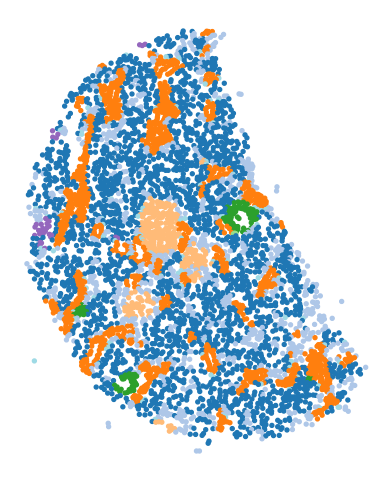

<Figure size 640x480 with 0 Axes>

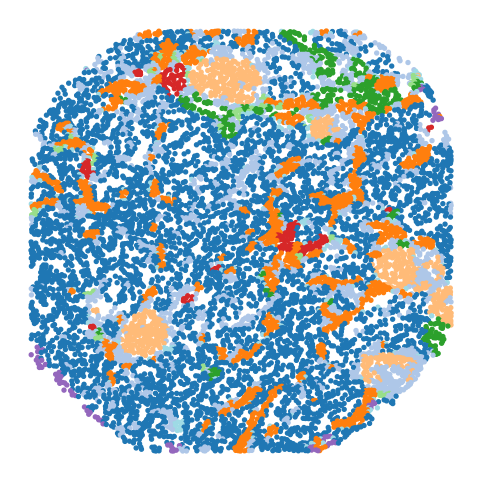

In [6]:
scgp.plot_all_regions_with_annotations(scgp_partitions, objs, figsize=6)

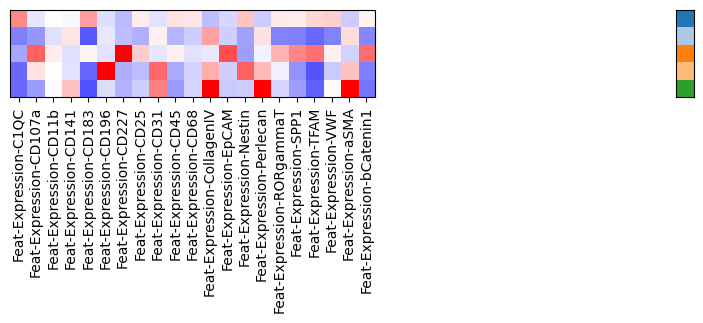

In [7]:
heatmap = scgp.plot_heatmap(scgp_partitions, objs, use_clusters=[0, 1, 2, 3, 4])

## 3. Run SCGP-Extension and Visualize

In [8]:
query_regions = ['DKD_kidney_005', 'DKD_kidney_010']
query_objs = []
for region_id in query_regions:
    cell_seg_df = scgp.load_cell_coords(f'data/DKD_kidney/{region_id}.cell_data.csv')
    biomarker_expression_df = scgp.load_cell_biomarker_expression(f'data/DKD_kidney/{region_id}.expression.csv')
    obj = scgp.construct_object(
        region_id, cell_seg_df, biomarker_expression_df,
        index_col='CELL_ID', mode='emobject')  # mode can be 'emobject' or 'anndata', both will work for the following steps
    query_objs.append(obj)

In [9]:
ref_dfs = scgp.make_pseudo_nodes(objs, scgp_partitions, use_partitions=[0, 1, 2, 3, 4], k=200, intra_knn=40)

In [10]:
scgpext_partitions, (features, model) = scgp.SCGPExtension_wrapper(
    query_objs, ref_dfs,
    # using 3NN within query nodes (`intra_feature_knn`) and
    # the top `ratio` of 3NN between query nodes and reference pseudo-nodes (`inter_feature_knn`)
    intra_feature_knn=3, inter_feature_knn=3, ratio=0.5, 
    rp=3e-4, smooth_iter=1, smooth_level=1, verbose=True)

Use 43237 spatial edges, 24576 feature edges, 22629 query-reference feature edges
Find 5 partitions
Featurization takes 6.42s, Clustering takes 6.22s


In [ ]:
# Similarly, SCGPExtension can be rerun using the generated feature and model objects
scgpext_partitions = scgp.SCGPExtension_partition(
    features, model, rp=3e-4, smooth_iter=1, smooth_level=2, verbose=False)

<Figure size 640x480 with 0 Axes>

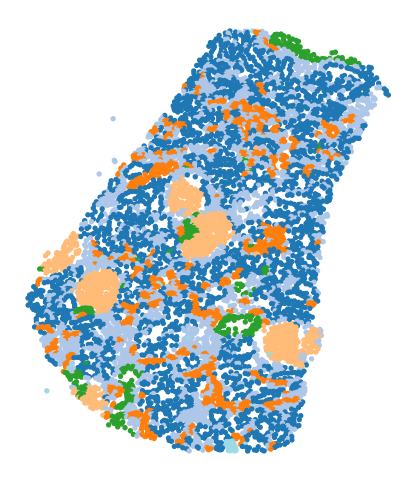

<Figure size 640x480 with 0 Axes>

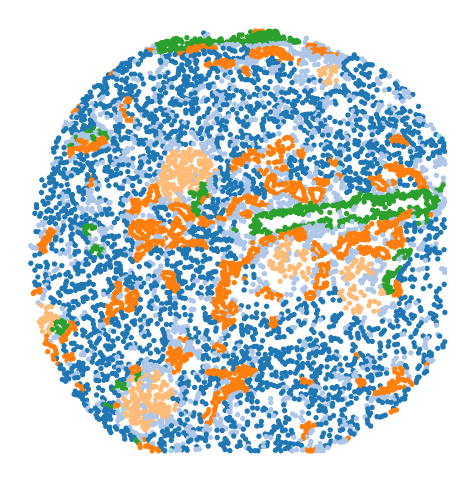

In [11]:
scgp.plot_all_regions_with_annotations(scgpext_partitions, query_objs, figsize=6)